# Run All

The data comes with an example LX11 tree.

This notebook shows how to run GAMMA on all of those trees, then plot the mass-metallicity relation

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import glob, time

import caga

from JINAPyCEE import gamma

In [2]:
hostID = 686
hostfname = "H1725272_LX11/rsid{}.npy".format(hostID)
subfnames = glob.glob("H1725272_LX11/*")
subfnames.remove(hostfname)

In [3]:
len(subfnames)

21

## Run GAMMA
Load all the trees and run GAMMA on everything

In [4]:
host_tree = caga.gamma_tree.load(hostfname)
sub_trees = [caga.gamma_tree.load(subfname) for subfname in subfnames]

In [5]:
SSPs_in = caga.precompute_ssps()
gamma_kwargs = {"sfe":0.005,"print_off":True}
mvir_thresh = 3e7

OMEGA run in progress..
SYGMA run in progress..
   SYGMA run completed - Run time: 0.12s
SYGMA run in progress..
   SYGMA run completed - Run time: 0.05s
SYGMA run in progress..
   SYGMA run completed - Run time: 0.05s
SYGMA run in progress..
   SYGMA run completed - Run time: 0.05s
SYGMA run in progress..
   SYGMA run completed - Run time: 0.06s
SYGMA run in progress..
   SYGMA run completed - Run time: 0.05s
Warning -- Not enough gas to sustain the SFH. 2
   OMEGA run completed - Run time: 3.85s


In [6]:
def run_gamma(gt, mvir_thresh, gamma_kwargs, SSPs_in):
    kwargs = caga.generate_kwargs(gt, mvir_thresh, SSPs_in=SSPs_in)
    kwargs.update(gamma_kwargs)
    g = gamma.gamma(**kwargs)
    return g

In [7]:
ghost = run_gamma(host_tree, mvir_thresh, gamma_kwargs, SSPs_in)

GAMMA run in progress..
   GAMMA run completed - Run time: 38.05s


In [8]:
start = time.time()
gsubs = [run_gamma(sub_tree, mvir_thresh, gamma_kwargs, SSPs_in) for sub_tree in sub_trees]
print("Total time is {:.1f}".format(time.time()-start))

GAMMA run in progress..
   GAMMA run completed - Run time: 0.57s
GAMMA run in progress..
   GAMMA run completed - Run time: 2.24s
GAMMA run in progress..
   GAMMA run completed - Run time: 0.84s
GAMMA run in progress..
   GAMMA run completed - Run time: 0.56s
GAMMA run in progress..
   GAMMA run completed - Run time: 0.83s
GAMMA run in progress..
   GAMMA run completed - Run time: 0.56s
GAMMA run in progress..
   GAMMA run completed - Run time: 2.41s
GAMMA run in progress..
   GAMMA run completed - Run time: 1.25s
GAMMA run in progress..
   GAMMA run completed - Run time: 1.11s
GAMMA run in progress..
   GAMMA run completed - Run time: 0.71s
GAMMA run in progress..
   GAMMA run completed - Run time: 0.85s
GAMMA run in progress..
   GAMMA run completed - Run time: 0.58s
GAMMA run in progress..
   GAMMA run completed - Run time: 0.84s
GAMMA run in progress..
   GAMMA run completed - Run time: 1.89s
GAMMA run in progress..
   GAMMA run completed - Run time: 0.68s
GAMMA run in progress..
 

## Calculate MDFs

In [9]:
%%time
host_mdf = caga.calc.mdf(ghost)
sub_mdfs = [caga.calc.mdf(g) for g in gsubs]

/Users/alexji/Dropbox/caterpillar/NuPyCEE/caga/caga/calc.py:54: RuntimeWarning: divide by zero encountered in log10
  Fe_H.append( np.log10(m_Fe_H_ratio) - np.log10((10**(7.50-12))*56.0) )


CPU times: user 464 ms, sys: 8.23 ms, total: 472 ms
Wall time: 469 ms


### Use MDFs to find mean [Fe/H]

In [10]:
host_Mstar = caga.calc.root_mstar(ghost)
subs_Mstar = [caga.calc.root_mstar(gsub) for gsub in gsubs]
host_FeH_mean = caga.find_distribution_mean(*host_mdf)
subs_FeH_mean = [caga.find_distribution_mean(*sub_mdf) for sub_mdf in sub_mdfs]
host_FeH_std = caga.find_distribution_std(*host_mdf)
subs_FeH_std = [caga.find_distribution_std(*sub_mdf) for sub_mdf in sub_mdfs]

Text(0,0.5,'[Fe/H]')

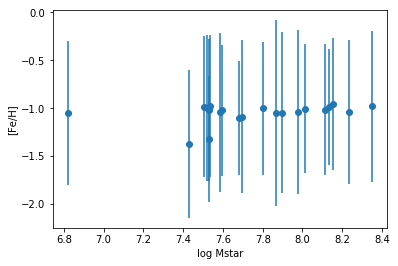

In [11]:
plt.errorbar(np.log10(subs_Mstar), subs_FeH_mean, yerr=subs_FeH_std, fmt='o')
plt.xlabel("log Mstar")
plt.ylabel('[Fe/H]')

Obviously this MZR is terrible!

You can also use the convenience functions to do this (it will recalculate the MDF every time you call it)

In [12]:
host_FeH_mean2 = caga.calc.root_FeH_mean(ghost)
subs_FeH_mean2 = [caga.calc.root_FeH_mean(gsub) for gsub in gsubs]
host_FeH_std2 = caga.calc.root_FeH_std(ghost)
subs_FeH_std2 = [caga.calc.root_FeH_std(gsub) for gsub in gsubs]

/Users/alexji/Dropbox/caterpillar/NuPyCEE/caga/caga/calc.py:54: RuntimeWarning: divide by zero encountered in log10
  Fe_H.append( np.log10(m_Fe_H_ratio) - np.log10((10**(7.50-12))*56.0) )


<Container object of 3 artists>

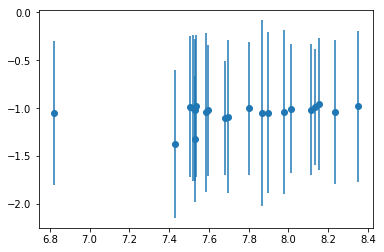

In [13]:
plt.errorbar(np.log10(subs_Mstar), subs_FeH_mean2, yerr=subs_FeH_std2, fmt='o')